In [19]:
import pandas as pd
import numpy as np 

In [20]:
lt=pd.read_csv(r"C:\Users\HP\Downloads\lungCapData.csv")

In [21]:
lt

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [22]:
lt.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [23]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [14]:
lt.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [24]:
lt.LungCap.value_counts()

8.350     8
8.000     7
7.825     7
8.775     7
6.450     7
         ..
3.025     1
5.475     1
7.150     1
12.200    1
3.850     1
Name: LungCap, Length: 342, dtype: int64

In [9]:
lt.shape

(725, 6)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
lt.Smoke = le.fit_transform(lt.Smoke)

In [40]:
lt.Gender = le.fit_transform(lt.Gender)

In [41]:
lt.Caesarean = le.fit_transform(lt.Caesarean)

In [42]:
lt.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [43]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int32  
 4   Gender     725 non-null    int32  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 28.4 KB


In [ ]:
#sampling

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
lt_train , lt_test = train_test_split(lt , test_size=0.2)

In [46]:
lt_train.shape

(580, 6)

In [47]:
725*0.8

580.0

In [ ]:
#in sampling defin x and y variable

In [48]:
lt_train_x = lt_train.iloc[:,1::]
lt_train_y = lt_train.iloc[:,0]

In [49]:
lt_test_x = lt_test.iloc[:,1::]
lt_test_y = lt_test.iloc[:,0]

In [50]:
lt_test_y.shape

(145,)

In [ ]:
# import the neceessary function for model building
# create object of that function 
# run the fit function and model is created 
# run the predict fun for prediction

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linereg = LinearRegression()

In [64]:
linereg.fit(lt_train_x, lt_train_y)

LinearRegression()

In [65]:
Rsquare = linereg.score(lt_train_x, lt_train_y)
Rsquare

0.8524836326707268

In [66]:
N = lt_train_x.shape[0]
k = lt_train_x.shape[1]

In [67]:
adj_rsq = 1 - (1-Rsquare)* (N-1) / (N-k-1)

In [68]:
adj_rsq

0.8511986468925973

In [54]:
pred_train = linereg.predict(lt_train_x)
pred_test = linereg.predict(lt_test_x)

In [55]:
err_test = lt_test_y - pred_test

In [72]:
err_test

441   -0.706378
229   -0.573317
502    0.084342
80     0.098420
105    0.344476
         ...   
672    0.534101
385    0.709501
529    0.027146
374    1.048979
484    1.481379
Name: LungCap, Length: 145, dtype: float64

In [ ]:
# not including in model 

In [73]:
linereg.coef_ #beta x slope

array([ 0.17230282,  0.2623837 , -0.59462011,  0.37019485, -0.23158304])

In [74]:
linereg.intercept_# beta not 

-11.346227406125436

In [79]:
mse = np.mean(np.square(err_test))
mse

1.1742933453803275

In [80]:
rmse = np.sqrt(mse)
rmse

1.0836481649411527

In [81]:
mape = np.mean(np.abs(err_test * 100/lt_test_y))

In [82]:
mape

13.227740699140131

In [ ]:
#lets checck assumption 

In [69]:
err_train = lt_train_y - pred_train

In [70]:
err_train

294   -0.377636
340   -0.222229
302    0.103463
325    0.742589
469   -1.242506
         ...   
492    0.743749
625    0.125111
575    2.159350
567    0.173773
597   -0.538157
Name: LungCap, Length: 580, dtype: float64

In [71]:
np.mean(err_train)

-2.9646783112749008e-15

In [72]:
import matplotlib.pyplot as plt

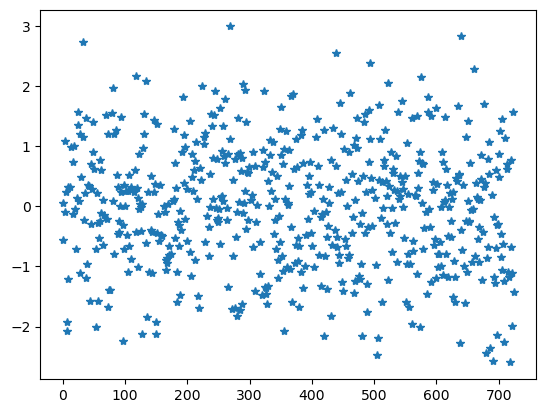

In [73]:
plt.plot(err_train, '*')

(array([ 5., 11.,  9., 20., 27., 42., 46., 50., 52., 65., 65., 54., 39.,
        34., 30., 14.,  9.,  4.,  1.,  3.]),
 array([-2.59789022, -2.31820666, -2.03852311, -1.75883956, -1.47915601,
        -1.19947245, -0.9197889 , -0.64010535, -0.36042179, -0.08073824,
         0.19894531,  0.47862887,  0.75831242,  1.03799597,  1.31767953,
         1.59736308,  1.87704663,  2.15673019,  2.43641374,  2.71609729,
         2.99578085]),
 <BarContainer object of 20 artists>)

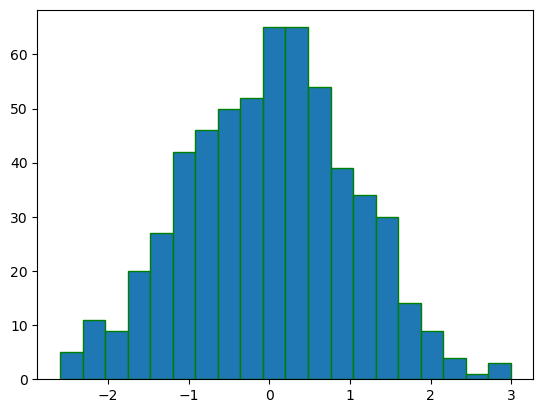

In [75]:
plt.hist(err_train, bins=20, edgecolor='g')

In [76]:
pred_actual_df = pd.DataFrame()

In [81]:
pred_actual_df ['Actual']= lt_train_y
pred_actual_df ['predicated']= pred_train

In [82]:
pred_actual_df

,Actual,predicated
294,7.150,7.527636
340,7.425,7.647229
302,6.550,6.446537
325,11.075,10.332411
469,10.400,11.642506
...,...,...
492,2.875,2.131251
625,8.350,8.224889
575,13.050,10.890650
567,10.700,10.526227


In [83]:
import seaborn as sns

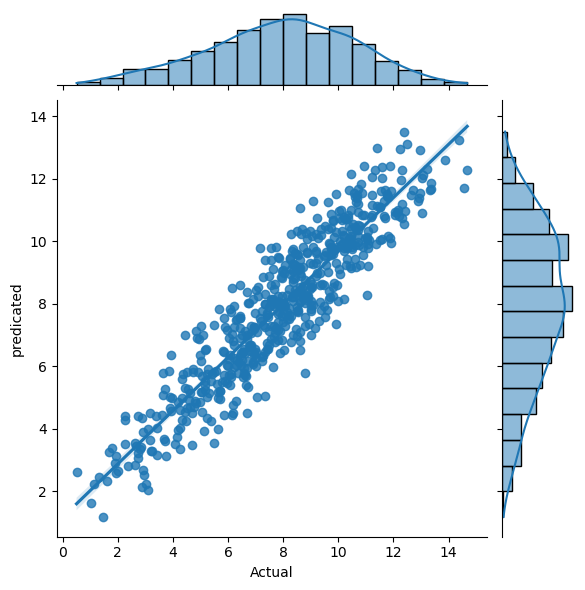

In [84]:
sns.jointplot(x='Actual', y ='predicated' , data=pred_actual_df, kind='reg')